# INFLUENCE OF PIXEL DIMENSIONS IN PERFORMANCE OF CONVOLUTIONAL   NEURAL NETWORK FOR CELL IMAGE CLASSIFICATION

In [1]:
# importing necessary libraries
import numpy as np
from numpy import savetxt
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import cv2
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Input,MaxPooling2D,Flatten,AveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
tf.keras.backend.set_floatx('float64')
import time

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

## GREY SCALED ANALYSIS

In [2]:
height = 50
width = 50

path1 = 'C:/Users/Rohan Krishna/Documents/Simulation Science/SEM 3/CIE/Project2/Chondrocytes/'
path2 =  'C:/Users/Rohan Krishna/Documents/Simulation Science/SEM 3/CIE/Project2/Stemcells/'

chondrocytes_list = []

# reading all the chrodrocytes images in greyscale
for chondrocyte in os.listdir(path1):
    chondrocyte_obj = cv2.imread(os.path.join(path1,chondrocyte))
    chondrocyte_obj = cv2.resize(chondrocyte_obj,(height,width))
    gray_image = cv2.cvtColor(chondrocyte_obj, cv2.COLOR_BGR2GRAY)
    chondrocyte_arr = np.array(gray_image)
    chondrocytes_list.append(chondrocyte_arr)
    
chondrocytes = np.asarray(chondrocytes_list)

stemcells_list = []
# reading all the stem cells images in greyscale
for stemcell in os.listdir(path2):
    stemcell_obj = cv2.imread(os.path.join(path2,stemcell))
    stemcell_obj = cv2.resize(stemcell_obj,(height,width))
    gray_image2 = cv2.cvtColor(stemcell_obj, cv2.COLOR_BGR2GRAY)
    stemcell_arr = np.array(gray_image2)
    stemcells_list.append(stemcell_arr)

stemcells = np.asarray(stemcells_list)
print('Chondrocytes Input Data = ',chondrocytes.shape)
print('Stemcells Input Data = ', stemcells.shape)     

chon_label = np.ones(len(chondrocytes),)
stem_label = np.zeros(len(stemcells),)
X = np.concatenate((chondrocytes,stemcells),axis=0)
Y = np.concatenate((chon_label,stem_label), axis = 0)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state=101)
X_train = X_train/255.0
X_test = X_test/255.0
X_test = X_test.reshape(-1,height,width,1)
#X_test.shape

# Perfrorming data argumentation 
data_agumentation1 = keras.Sequential([layers.experimental.preprocessing.RandomFlip(mode="horizontal"),])
data_agumentation2 = keras.Sequential([layers.experimental.preprocessing.RandomFlip(mode="vertical"),])
aug = {
        'au1' : data_agumentation1,
        'au2' : data_agumentation2,
       }
print("Before Augumentation: ",X_train.shape)
print("Before Augumentation: ",y_train.shape)
augumentedX = []
augumentedY = []

# appending argumented data into training set
for _,value in aug.items():
    count = 0
    for item in X_train:
        augumentedX.append(value(item.reshape(1,height,width,1)).numpy().squeeze())
        augumentedY.append(y_train[count])
        count += 1 
        

augumentedX = np.asarray(augumentedX)
augumentedY = np.asarray(augumentedY)

augumentedX = np.concatenate((X_train,augumentedX),axis=0)
augumentedY = np.concatenate((y_train,augumentedY),axis=0)

# makings arrays into suitable shape for training the CNN
finalX = np.zeros((augumentedX.shape[0],height,width,1))

count = 0
for item in augumentedX:
    finalX[count] = item.reshape(1,height,width,1)
    count += 1
  

print("After Augumentation: ",finalX.shape)
print("After Augumentation: ",augumentedY.shape)


Chondrocytes Input Data =  (64, 50, 50)
Stemcells Input Data =  (147, 50, 50)
Before Augumentation:  (158, 50, 50)
Before Augumentation:  (158,)
After Augumentation:  (474, 50, 50, 1)
After Augumentation:  (474,)


In [3]:
# building CNN (Same structure as in project 2)
cnn_model = Sequential()

cnn_model.add(Conv2D(16,(5,5),activation='relu'))
cnn_model.add(MaxPooling2D((2,2),strides=2))
cnn_model.add(Conv2D(192,(5,5),activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(200,activation= 'relu'))
cnn_model.add(Dense(1,activation='sigmoid'))

cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

# measuring training time
start = time.time()
cnn_model.fit(finalX,augumentedY, epochs=50)
end = time.time()
print(end - start)

eval = cnn_model.evaluate(X_test, y_test)
summary = cnn_model.summary()

Epoch 1/50
15/15 [==============================] - 7s 499ms/step - loss: 0.6538 - accuracy: 0.6772
Epoch 2/50
15/15 [==============================] - 7s 486ms/step - loss: 0.4638 - accuracy: 0.8270
Epoch 3/50
15/15 [==============================] - 7s 452ms/step - loss: 0.3932 - accuracy: 0.8312
Epoch 4/50
15/15 [==============================] - 7s 449ms/step - loss: 0.3855 - accuracy: 0.8565
Epoch 5/50
15/15 [==============================] - 7s 447ms/step - loss: 0.3220 - accuracy: 0.8418
Epoch 6/50
15/15 [==============================] - 7s 491ms/step - loss: 0.2827 - accuracy: 0.8734
Epoch 7/50
15/15 [==============================] - 8s 517ms/step - loss: 0.2921 - accuracy: 0.8819
Epoch 8/50
15/15 [==============================] - 7s 488ms/step - loss: 0.2035 - accuracy: 0.8966
Epoch 9/50
15/15 [==============================] - 7s 452ms/step - loss: 0.1583 - accuracy: 0.9409
Epoch 10/50
15/15 [==============================] - 8s 505ms/step - loss: 0.1370 - accuracy: 0.9473

In [4]:
print(end - start)

389.0392849445343


In [5]:
eval = cnn_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 47ms/step - loss: 0.4522 - accuracy: 0.9245


## RGB ANALYSIS

In [6]:
path1 = 'C:/Users/Rohan Krishna/Documents/Simulation Science/SEM 3/CIE/Project2/Chondrocytes/'
path2 =  'C:/Users/Rohan Krishna/Documents/Simulation Science/SEM 3/CIE/Project2/Stemcells/'

chondrocytes_list = []
# reading all the chrodrocytes images in RGB
for chondrocyte in os.listdir(path1):
    chondrocyte_obj = cv2.imread(os.path.join(path1,chondrocyte))
    chondrocyte_obj = cv2.resize(chondrocyte_obj,(height,width))
    chondrocyte_arr = np.array(chondrocyte_obj)
    chondrocytes_list.append(chondrocyte_arr)
    
chondrocytes = np.asarray(chondrocytes_list)

stemcells_list = []
# reading all the stemcells images in RGB 
for stemcell in os.listdir(path2):
    stemcell_obj = cv2.imread(os.path.join(path2,stemcell))
    stemcell_obj = cv2.resize(stemcell_obj,(height,width))
    stemcell_arr = np.array(stemcell_obj)
    stemcells_list.append(stemcell_arr)

stemcells = np.asarray(stemcells_list)
    
print('Chondrocytes Input Data = ',chondrocytes.shape)
print('Stemcells Input Data = ', stemcells.shape) 

chon_label = np.ones(len(chondrocytes),)
stem_label = np.zeros(len(stemcells),)

X = np.concatenate((chondrocytes,stemcells),axis=0)
Y = np.concatenate((chon_label,stem_label), axis = 0)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.25, random_state=101)
X_train = X_train/255.0
X_test = X_test/255.0

# Perfrorming data argumentation 
data_agumentation1 = keras.Sequential([layers.experimental.preprocessing.RandomFlip(mode="horizontal"),])
data_agumentation2 = keras.Sequential([layers.experimental.preprocessing.RandomFlip(mode="vertical"),])
aug = {
        'au1' : data_agumentation1,
        'au2' : data_agumentation2,
       }
print("Before Augumentation: ",X_train.shape)
print("Before Augumentation: ",y_train.shape)

# appending argumented data into training set
augumentedX = []
augumentedY = []
for _,value in aug.items():
    count = 0
    for item in X_train:
        augumentedX.append(value(item.reshape(1,height,width,3)).numpy().squeeze())
        augumentedY.append(y_train[count])
        count += 1 
        
# makings arrays into suitable shape for training the CNN
augumentedX = np.concatenate((X_train,augumentedX),axis=0)
augumentedY = np.concatenate((y_train,augumentedY),axis=0)

finalX = np.zeros((augumentedX.shape[0],height,width,3))

count = 0
for item in augumentedX:
    finalX[count] = item.reshape(1,height,width,3)
    count += 1
  

print("After Augumentation: ",finalX.shape)
print("After Augumentation: ",augumentedY.shape)

Chondrocytes Input Data =  (64, 50, 50, 3)
Stemcells Input Data =  (147, 50, 50, 3)
Before Augumentation:  (158, 50, 50, 3)
Before Augumentation:  (158,)
After Augumentation:  (474, 50, 50, 3)
After Augumentation:  (474,)


In [7]:
# building CNN (Same structure as in project 2)
cnn_model = Sequential()

cnn_model.add(Conv2D(16,(5,5),activation='relu'))
cnn_model.add(MaxPooling2D((2,2),strides=2))
cnn_model.add(Conv2D(192,(5,5),activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(200,activation= 'relu'))
cnn_model.add(Dense(1,activation='sigmoid'))

cnn_model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
# measuring training time
start = time.time()
cnn_model.fit(finalX,augumentedY, epochs=50)
end = time.time()
print(end - start)

eval = cnn_model.evaluate(X_test, y_test)
cnn_model.summary()

Epoch 1/50
15/15 [==============================] - 8s 536ms/step - loss: 0.7080 - accuracy: 0.6139
Epoch 2/50
15/15 [==============================] - 8s 524ms/step - loss: 0.5429 - accuracy: 0.7722
Epoch 3/50
15/15 [==============================] - 8s 505ms/step - loss: 0.5709 - accuracy: 0.7911
Epoch 4/50
15/15 [==============================] - 8s 517ms/step - loss: 0.4323 - accuracy: 0.8481
Epoch 5/50
15/15 [==============================] - 8s 531ms/step - loss: 0.3800 - accuracy: 0.8397
Epoch 6/50
15/15 [==============================] - 9s 578ms/step - loss: 0.3076 - accuracy: 0.8903
Epoch 7/50
15/15 [==============================] - 8s 546ms/step - loss: 0.2255 - accuracy: 0.9156
Epoch 8/50
15/15 [==============================] - 8s 550ms/step - loss: 0.2094 - accuracy: 0.9135
Epoch 9/50
15/15 [==============================] - 8s 502ms/step - loss: 0.1820 - accuracy: 0.9304
Epoch 10/50
15/15 [==============================] - 8s 522ms/step - loss: 0.1352 - accuracy: 0.9578

In [8]:
print(end - start)

436.999662399292


In [9]:
eval = cnn_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 47ms/step - loss: 0.3870 - accuracy: 0.9057


Text(0.5, 1.0, 'Semilog Parameters plots')

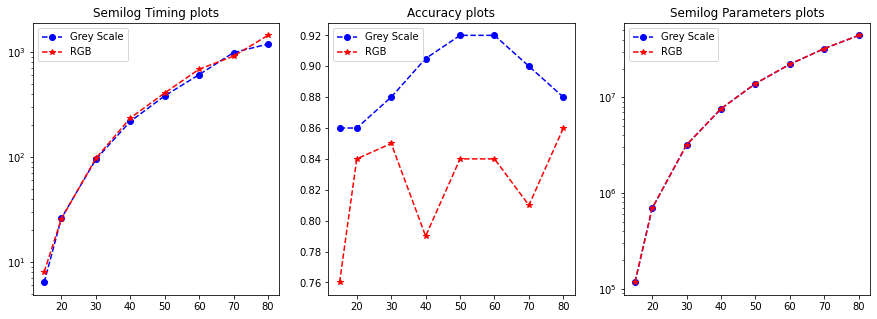

In [10]:
# Plotting the result obtained during the study
x = np.array([15,20,30,40,50,60,70,80])

num_par_grey = np.array([116209,692209,3188209,7604209, 13940209, 22196209, 32372209, 44468209])
time_grey = np.array([6.4, 26.10, 94.95,218.14,382.68, 608.87, 988.28, 1191.11])
acc_grey = np.array([0.86,0.86,0.88, 0.905, 0.92, 0.92, 0.90,0.88])


num_par_rgb = np.array([117009,693009,3189009,7605009, 13941009, 22197009, 32373009, 44469009])
time_rgb = np.array([8.05,25.76, 97.08, 235.03, 407.42, 686.44, 913.15, 1441.61])
acc_rgb = np.array([0.76,0.84, 0.85,0.79,0.84, 0.84,  0.81, 0.86])

fig,axs = plt.subplots(1,3,figsize=(15,5))

axs[0].semilogy(x,time_grey,label = 'Grey Scale',linestyle='--', marker='o', color='blue')
axs[0].semilogy(x,time_rgb,label = 'RGB',linestyle='--', marker='*', color='red')
axs[0].set_title('Semilog Timing plots')
axs[0].legend()    
    
axs[1].plot(x,acc_grey, label = 'Grey Scale',linestyle='--', marker='o', color='blue')
axs[1].plot(x,acc_rgb, label = 'RGB',linestyle='--', marker='*', color='red') 
axs[1].legend()
axs[1].set_title('Accuracy plots')

axs[2].semilogy(x,num_par_grey, label = 'Grey Scale',linestyle='--', marker='o', color='blue')
axs[2].semilogy(x,num_par_rgb, label = 'RGB',linestyle='--', marker='*', color='red')
axs[2].legend()
axs[2].set_title('Semilog Parameters plots')